In [1]:
import pandas as pd
df=pd.read_csv('Churn_Modelling.csv')


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [7]:
## Feature engineering
geography= pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [8]:
## concatenate these variables in dataframe
x=x.drop(['Geography','Gender'],axis=1)

In [9]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [10]:
x=pd.concat([x,geography,gender],axis=1)

In [11]:
## splitting into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)



In [13]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
x_train.shape

(8000, 11)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [17]:
### lets initialize ANN
classifier=Sequential()

In [18]:
#Adding the first input layer
classifier.add(Dense(units=11,activation='relu'))


In [19]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
#adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))


In [20]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [22]:
## Early stopping
import tensorflow as tf
import keras
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [23]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 12s 10ms/step - loss: 0.5145 - accuracy: 0.7449 - val_loss: 0.4420 - val_accuracy: 0.8012
Epoch 2/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.4228 - accuracy: 0.8123 - val_loss: 0.4209 - val_accuracy: 0.8164
Epoch 3/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.4023 - accuracy: 0.8263 - val_loss: 0.4041 - val_accuracy: 0.8236
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3877 - accuracy: 0.8278 - val_loss: 0.3929 - val_accuracy: 0.8273
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3761 - accuracy: 0.8317 - val_loss: 0.3878 - val_accuracy: 0.8266
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3692 - accuracy: 0.8350 - val_loss: 0.3837 - val_accuracy: 0.8243
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3620 - accuracy: 0.8421 - val_loss: 0.3770 - val_accur

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

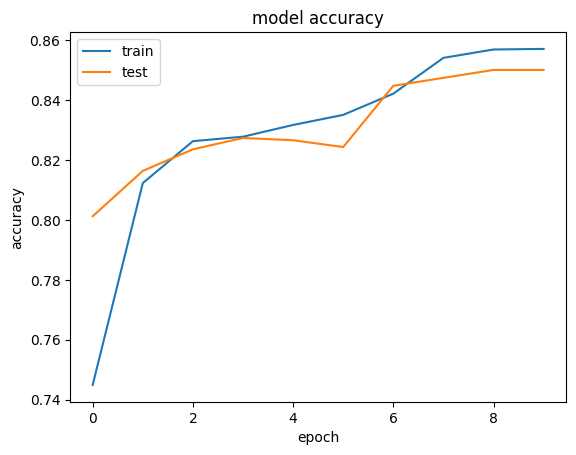

In [25]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

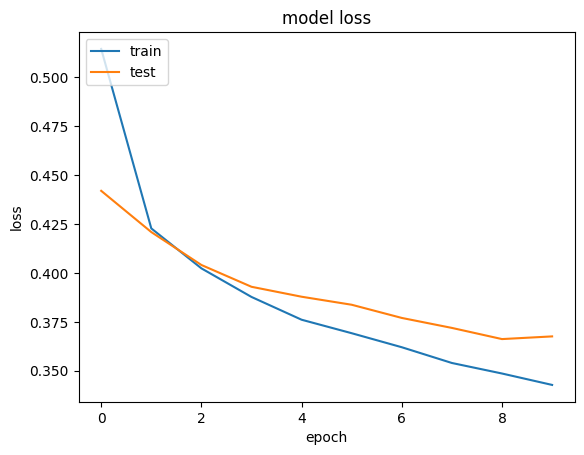

In [26]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
## part 3 Making the predictions and evaluating the model

## predicting the test results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [28]:
## make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1486,  109],
       [ 196,  209]])

In [29]:
## calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8475

In [31]:
## get the weights
classifier.get_weights()

[array([[-2.8336272e-01, -2.7099153e-02, -3.9184558e-01, -4.7956172e-02,
         -6.0919490e-02, -4.7935307e-02, -1.5790796e-01, -1.3936804e-01,
          1.2272304e-01, -1.3792306e-01, -1.7495124e-01],
        [-2.9334360e-01, -3.8905826e-01,  2.4473114e-01,  5.0031990e-01,
         -6.9802767e-01,  5.0108105e-01, -3.9932215e-01,  4.7450110e-01,
         -5.8749366e-01,  2.1446751e-02,  7.2889730e-02],
        [-2.1862259e-02,  3.7813011e-01, -3.7100691e-01,  1.3921840e-01,
         -3.2540947e-01,  1.2970638e-01,  2.9028669e-01, -3.5726884e-01,
         -1.1509086e-01, -6.5166518e-02,  2.6670897e-01],
        [-4.7041440e-01, -2.9701370e-01,  2.9694900e-01, -1.7511542e-01,
         -2.4370681e-01, -4.3370429e-02, -2.6354399e-01, -2.8500798e-01,
          1.3080610e-01, -1.6886324e-02, -9.6261519e-01],
        [-7.2961532e-02,  4.7178470e-02, -8.2378477e-02,  5.5318320e-01,
          2.1724081e-01,  2.0060536e-01,  5.2820528e-01, -7.7815235e-01,
          1.3610660e-01,  1.0677981e+0